In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

In [49]:
# Approximation of the 99 % confidence interval of the mean.
# See: Theorem 2.2 in J.-I. Le Boudec: Performance Evaluation of Computer and Communication Systems. 
# EPFL Press, 2010 (available online: https://leboudec.github.io/perfeval/)
#
# Requirements: 
# (1) data is iid
# (2) data has finite variance 
# (3) number of samples is large 
def mean_99confint(data):
    m = np.mean(data)
    sem = stats.sem(data) # standard error of the mean (sem) = sigma / sqrt(n) 
    h = 2.58*sem
    return m-h, m+h

# Confidence interval of the mean.
# See: Theorem 2.3 in J.-I. Le Boudec: Performance Evaluation of Computer and Communication Systems. 
# EPFL Press, 2010 (available online: https://leboudec.github.io/perfeval/)
#
# Requirements:
# (1) iid data 
# (2) normally distributed data. See Q-Q-plot for a visual indication that our data is approximately 
#     normally distributed.
def mean_confint(data, confidence=0.95):
    n = len(data)
    m = np.mean(data)
    sem = stats.sem(data) # standard error of the mean (sem) = sigma / sqrt(n) 
    h = sem * stats.t.ppf((1.0+confidence)/2.0, n-1)
    return m-h, m+h

In [50]:
file_nodelay= '/home/mostovea/6g-projects/InvertedPendulum/src/build/states-eventqueue.csv'   #'log-p80-i60-d0-nodelay.csv'
df_delay = pd.read_csv(file_nodelay, names= ['t', 'position', 'vx', 'angle', 'omega'], header=None, skiprows=1)
df_delay.head()

,t,position,vx,angle,omega
0,0.001,4.164450e-07,0.000833,19.9965,0.010340
1,0.002,1.665780e-06,0.001666,19.9974,0.020681
2,0.003,3.748040e-06,0.002499,19.9989,0.031022
3,0.004,6.663230e-06,0.003332,20.0010,0.041364
4,0.005,1.041140e-05,0.004165,20.0036,0.051707


In [51]:
#file_delay='log-p80-i60-d0-delay5g1.csv'
#file_delay='log-p80-i60-d0-delay5g2a.csv'
#_df_delay = pd.read_csv(file_delay, names=['t', 'position', 'vx', 'angle', 'omega', 'force'])
#_df_delay.head()

In [52]:
#t_last = min(max(_df_delay['t']), max(_df_nodelay['t']))
#df_delay = _df_delay[_df_delay['t'] <= t_last]
#df_nodelay = _df_nodelay[_df_nodelay['t'] <= t_last]

In [53]:
# Square errors
df_delay['angle'] = pd.to_numeric(df_delay['angle'], errors='coerce')
se_delay = df_delay['angle']**2
#se_nodelay = df_nodelay['angle']**2
# Mean square errors
mse_delay = se_delay.sum()/len(se_delay)
#mse_nodelay = se_nodelay.sum()/len(se_nodelay)
#print("Mean square error w/o delay = " + str(mse_nodelay))
print("Mean square error w/ delay = " + str(mse_delay))

Mean square error w/ delay = 2.365345243062391


In [54]:
#mean_l,mean_h = mean_confint(df_nodelay['angle'], confidence=0.99)
#print("w/o delay: mean_conf99 = [" + str(mean_l) + " s, " + str(mean_h) + " s]")
mean_l,mean_h = mean_confint(df_delay['angle'], confidence=0.99)
print("w/ delay: mean_conf99 = [" + str(mean_l) + " s, " + str(mean_h) + " s]")

w/ delay: mean_conf99 = [-0.016479368541885007 s, 0.016140513510081323 s]


In [55]:
#data = [df_nodelay['angle'], df_delay['angle']]

#labels = ['w/o delay', 'w/ delay']
#_ = plt.boxplot(data, notch=True, whis=[0,100], labels=labels)
#plt.ylabel('angle [degree]')
#plt.xlabel('');
#plt.title('Median pole angle');

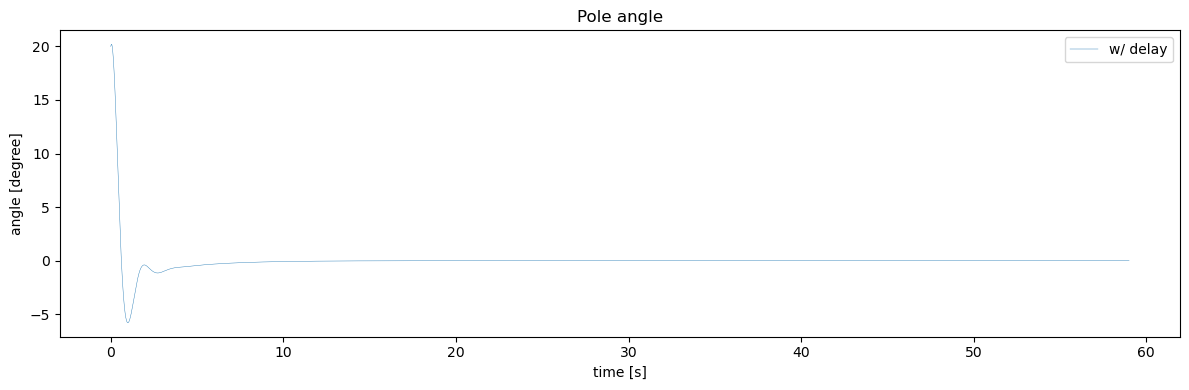

In [56]:
plt.figure(figsize=(12, 4))

plt.plot(df_delay['t'], df_delay['angle'], label="w/ delay", linewidth=0.3)
#plt.scatter(df_delay['t'], df_delay['angle'], marker='.', label="w/ delay", linewidths=0.3)
#plt.scatter(df_delay['t']/1000000, df_delay['angle'],  marker='.', label="w/ delay")
plt.ylabel('angle [degree]')
plt.xlabel('time [s]');
plt.title('Pole angle');
plt.legend(loc="upper right");

plt.tight_layout()

plt.savefig('angle_plot_events.png', dpi=300)

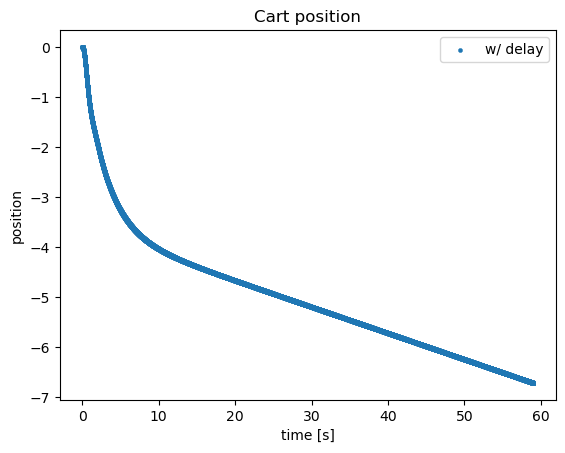

In [57]:
plt.scatter(df_delay['t'],df_delay['position'], marker='.', label="w/ delay", linewidths=0.3)
#plt.scatter(df_delay['t']/1000000, df_delay['angle'],  marker='.', label="w/ delay")
plt.ylabel('position')
plt.xlabel('time [s]');
plt.title('Cart position');
plt.legend(loc="upper right");

#plt.savefig('position_plot.png', dpi=300)

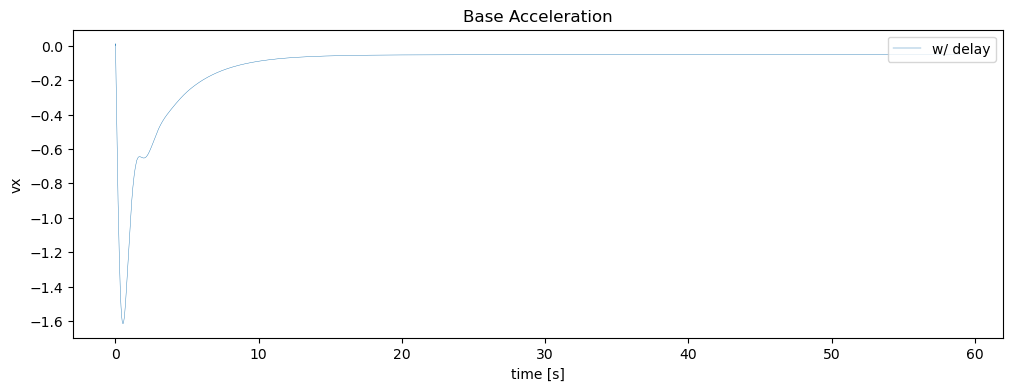

In [58]:
plt.figure(figsize=(12, 4))

plt.plot(df_delay['t'], df_delay['vx'], label="w/ delay", linewidth=0.3)
#plt.scatter(df_delay['t'], df_delay['force'], marker='.', label="w/ delay", linewidths=0.3)
#plt.scatter(df_delay['t']/1000000, df_delay['angle'],  marker='.', label="w/ delay")
plt.ylabel('vx')
plt.xlabel('time [s]');
plt.title('Base Acceleration');
plt.legend(loc="upper right");